In [20]:
!pip install yt > /dev/null  # install yt
!pip install git+https://github.com/yt-project/yt.git  # install yt (development version)
!pip install pooch pandas > /dev/null # to download example datasets


[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: pip install --upgrade pip


In [124]:
import yt
import matplotlib.pyplot as plt
import numpy as np

# First steps - load and inspect metadata

In [343]:
# ds = yt.load_sample("output_00080")
ds = yt.load("output_00230")

yt : [INFO     ] 2023-04-17 14:12:35,797 Parameters: current_time              = 2.0524809024633055
yt : [INFO     ] 2023-04-17 14:12:35,797 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2023-04-17 14:12:35,798 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-04-17 14:12:35,798 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-04-17 14:12:35,798 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-04-17 14:12:35,798 Parameters: current_redshift          = 2.0576423234187393
yt : [INFO     ] 2023-04-17 14:12:35,799 Parameters: omega_lambda              = 0.68419998884201
yt : [INFO     ] 2023-04-17 14:12:35,799 Parameters: omega_matter              = 0.31580001115799
yt : [INFO     ] 2023-04-17 14:12:35,799 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2023-04-17 14:12:35,799 Parameters: hubble_constant           = 0.6731999969482421


In [243]:
ds.current_time.to("Gyr")

unyt_quantity(3.18279309, 'Gyr')

In [244]:
ds.current_redshift

2.0576423234187393

In [245]:
ds.parameters

{'HydroMethod': 'ramses',
 'Time': 1.0,
 'ncpu': 352,
 'ndim': 3,
 'levelmin': 9,
 'levelmax': 22,
 'ngridmax': 500000,
 'nstep_coarse': 8109,
 'boxlen': 1.0,
 'time': -2.2198489389408,
 'aexp': 0.327049371452284,
 'H0': 67.3199996948242,
 'omega_m': 0.31580001115799,
 'omega_l': 0.68419998884201,
 'omega_k': 0.0,
 'omega_b': 0.049,
 'unit_l': 1.49630430935895e+26,
 'unit_d': 7.69162751800601e-29,
 'unit_t': 4.89365387559142e+16,
 'ordering type': 'hilbert',
 'namelist': 'An error occurred when reading the namelist: This functionality requires the f90nml package to be installed.'}

The "raw" fields are contained in the `io` and `ramses` field types (for particle and grid-based data respectively).

In [246]:
ds.fields.ramses.Density

yt : [INFO     ] 2023-04-17 13:42:42,391 Adding particle_type: DM
yt : [INFO     ] 2023-04-17 13:42:42,398 Adding particle_type: star
yt : [INFO     ] 2023-04-17 13:42:42,405 Adding particle_type: cloud
yt : [INFO     ] 2023-04-17 13:42:42,412 Adding particle_type: dust
yt : [INFO     ] 2023-04-17 13:42:42,419 Adding particle_type: star_tracer
yt : [INFO     ] 2023-04-17 13:42:42,426 Adding particle_type: cloud_tracer
yt : [INFO     ] 2023-04-17 13:42:42,434 Adding particle_type: dust_tracer
yt : [INFO     ] 2023-04-17 13:42:42,442 Adding particle_type: gas_tracer


On-Disk Field ('ramses', 'Density'): (units: 'code_density')

In [247]:
print("\n".join(list(str(v) for v in ds.derived_field_list if v[0] in ("ramses", "io"))))

('io', 'age')
('io', 'conformal_birth_time')
('io', 'mesh_id')
('io', 'particle_angular_momentum')
('io', 'particle_angular_momentum_magnitude')
('io', 'particle_angular_momentum_x')
('io', 'particle_angular_momentum_y')
('io', 'particle_angular_momentum_z')
('io', 'particle_birth_time')
('io', 'particle_family')
('io', 'particle_identity')
('io', 'particle_index')
('io', 'particle_level')
('io', 'particle_mass')
('io', 'particle_metallicity')
('io', 'particle_ones')
('io', 'particle_partp')
('io', 'particle_position')
('io', 'particle_position_cylindrical_radius')
('io', 'particle_position_cylindrical_theta')
('io', 'particle_position_cylindrical_z')
('io', 'particle_position_relative_x')
('io', 'particle_position_relative_y')
('io', 'particle_position_relative_z')
('io', 'particle_position_spherical_phi')
('io', 'particle_position_spherical_radius')
('io', 'particle_position_spherical_theta')
('io', 'particle_position_x')
('io', 'particle_position_y')
('io', 'particle_position_z')
('

In [248]:
ds.print_stats()

level	       # cells	     # cells^3
--------------------------------------
  0	             0	             0
  1	             1	             1
  2	             8	             2
  3	            64	             4
  4	           512	             8
  5	          4096	            16
  6	         32768	            32
  7	        262144	            64
  8	       2097152	           128
  9	      39205278	           340
 10	        101708	            47
 11	        173102	            56
 12	        336000	            70
 13	        323362	            69
 14	        313552	            68
 15	        295898	            67
 16	        299876	            67
 17	        320874	            69
 18	        171970	            56
 19	        111658	            49
 20	         67466	            41
 21	             0	             0
 22	             0	             0
----------------------------------------------
   	      44117489


z = 2.05764232
t = 2.05248090e+00 = 1.00441311e+17 s = 3.18279309e+09 years

# Accessing the raw data

In yt, the `ds` object contains the _metadata_. One needs to select a region to access the actual data.

In [249]:
ad = ds.all_data()  # ad : All Data
sp = ds.sphere("max", (1, "Mpc"))  # sp : Sphere

yt : [INFO     ] 2023-04-17 13:43:39,324 max value is 9.32094e-22 at 0.4876856803894043 0.5020756721496582 0.5048756599426270


In [250]:
ad["gas", "density"].shape, ad["io", "particle_identity"].shape

((140007792,), (145738770,))

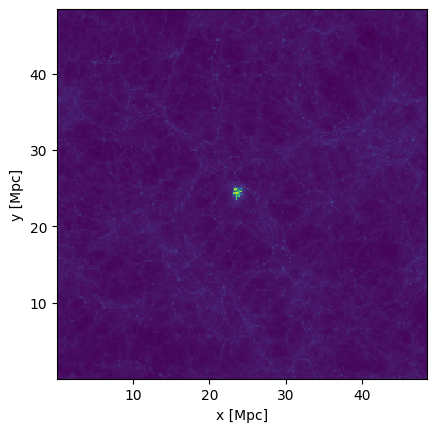

In [251]:
rho, x, y, z = ad["gas", "density"], ad["ramses", "x"], ad["ramses", "y"], ad["ramses", "z"]

plt.hist2d(x.to("Mpc"), y.to("Mpc"), bins=256, weights=rho, norm=plt.matplotlib.colors.LogNorm())
plt.xlabel("x [Mpc]")
plt.ylabel("y [Mpc]")
plt.gca().set_aspect("equal")

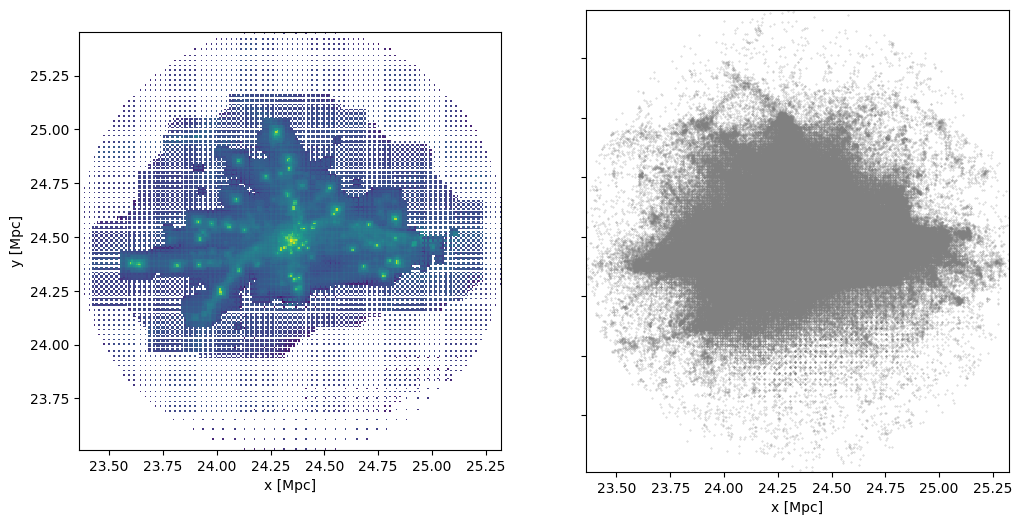

In [252]:
rho, x, y, z = sp["gas", "density"], sp["ramses", "x"], sp["ramses", "y"], sp["ramses", "z"]
xp = sp["io", "particle_position"]
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

axes[0].hist2d(y.to("Mpc"), z.to("Mpc"), bins=256, weights=rho, norm=plt.matplotlib.colors.LogNorm())
axes[1].scatter(xp[:, 1].to("Mpc"), xp[:, 2].to("Mpc"), s=0.1, c="gray", alpha=0.5)
axes[0].set_xlabel("x [Mpc]")
axes[1].set_xlabel("x [Mpc]")
axes[0].set_ylabel("y [Mpc]")
axes[0].set_aspect("equal")

# Plotting

yt : [INFO     ] 2023-04-17 13:46:13,456 xlim = 0.002076 1.002076
yt : [INFO     ] 2023-04-17 13:46:13,457 ylim = 0.004876 1.004876
yt : [INFO     ] 2023-04-17 13:46:13,458 xlim = 0.002076 1.002076
yt : [INFO     ] 2023-04-17 13:46:13,458 ylim = 0.004876 1.004876
yt : [INFO     ] 2023-04-17 13:46:13,463 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



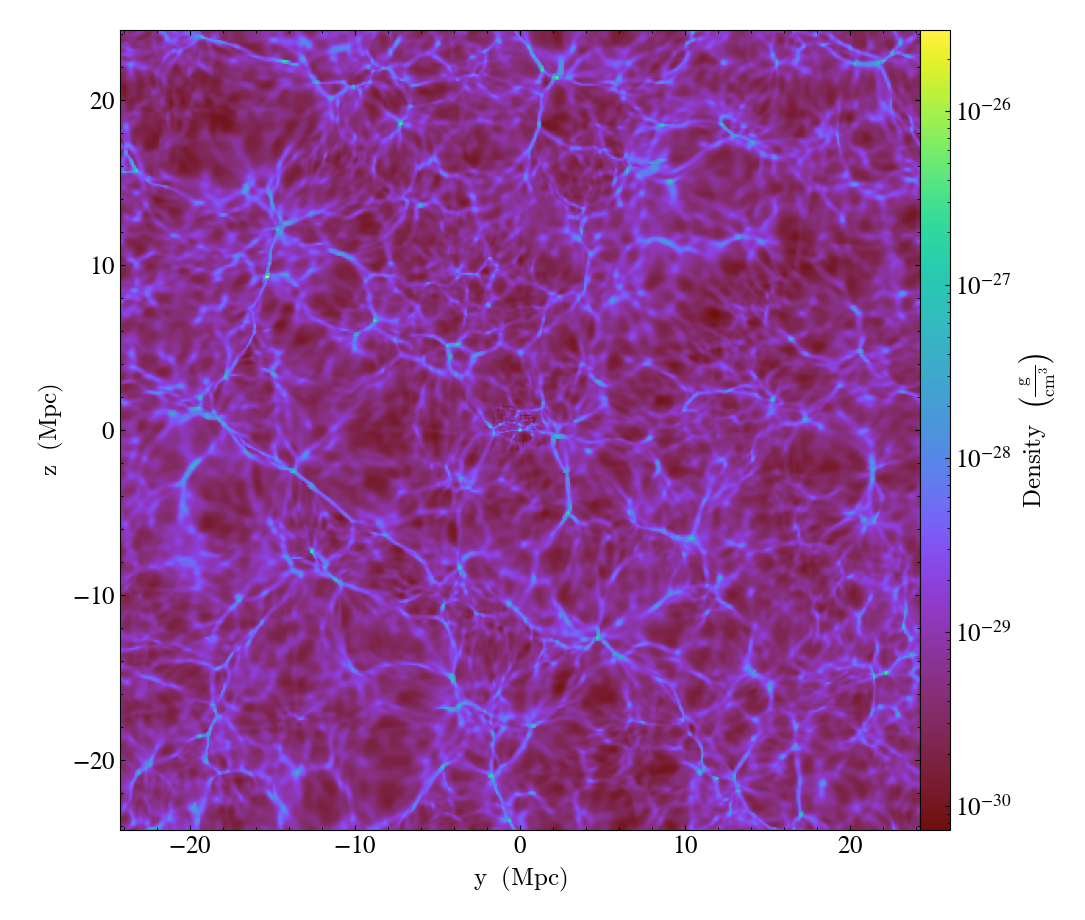

In [253]:
p = yt.SlicePlot(ds, "x", ("gas", "density"), center="max")
p

yt : [INFO     ] 2023-04-17 13:52:01,912 xlim = 0.496920 0.507231
yt : [INFO     ] 2023-04-17 13:52:01,914 ylim = 0.499720 0.510031
yt : [INFO     ] 2023-04-17 13:52:01,915 xlim = 0.496920 0.507231
yt : [INFO     ] 2023-04-17 13:52:01,916 ylim = 0.499720 0.510031
yt : [INFO     ] 2023-04-17 13:52:01,917 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



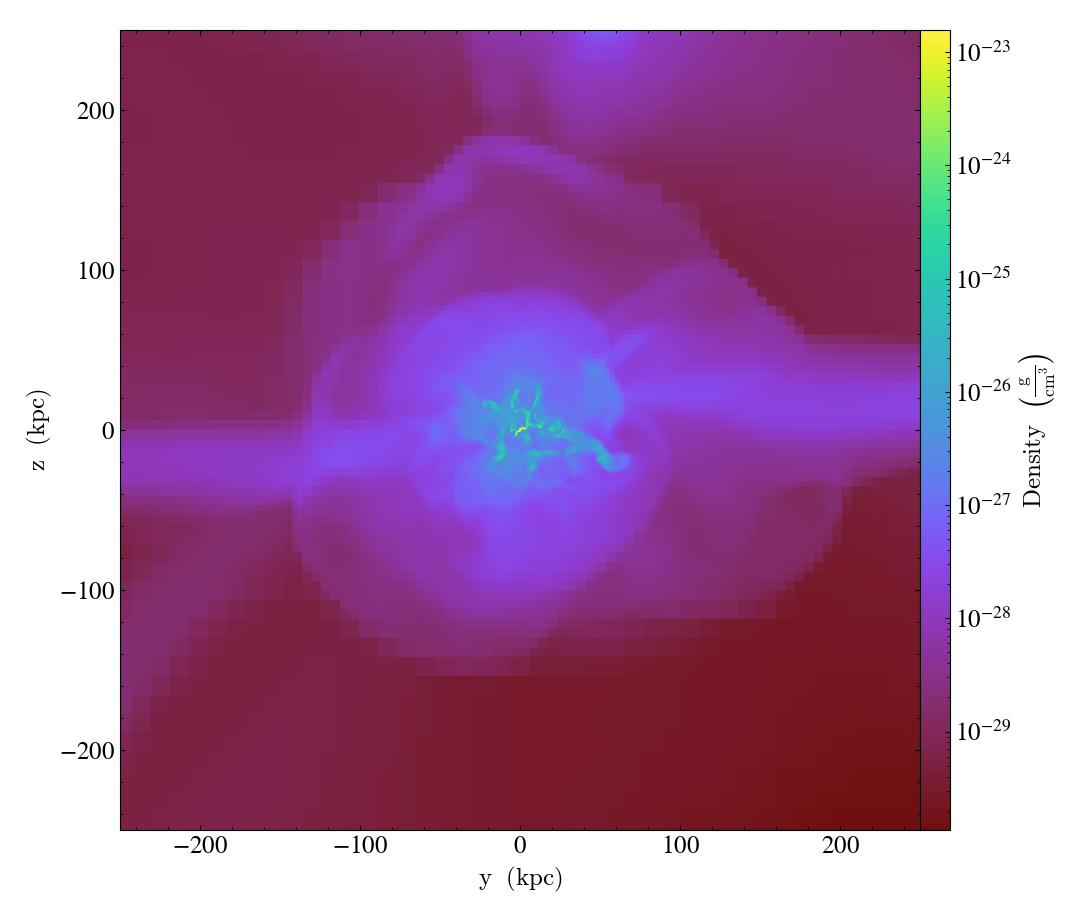

In [268]:
p = yt.SlicePlot(ds, "x", ("gas", "density"), center=sp.center, data_source=sp, width=(500, "kpc"))
p

yt : [INFO     ] 2023-04-17 14:03:51,957 Projection completed
yt : [INFO     ] 2023-04-17 14:03:51,960 xlim = 0.487170 0.488201
yt : [INFO     ] 2023-04-17 14:03:51,961 ylim = 0.501560 0.502591
yt : [INFO     ] 2023-04-17 14:03:51,963 xlim = 0.487170 0.488201
yt : [INFO     ] 2023-04-17 14:03:51,963 ylim = 0.501560 0.502591
yt : [INFO     ] 2023-04-17 14:03:51,964 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2023-04-17 14:03:52,065 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



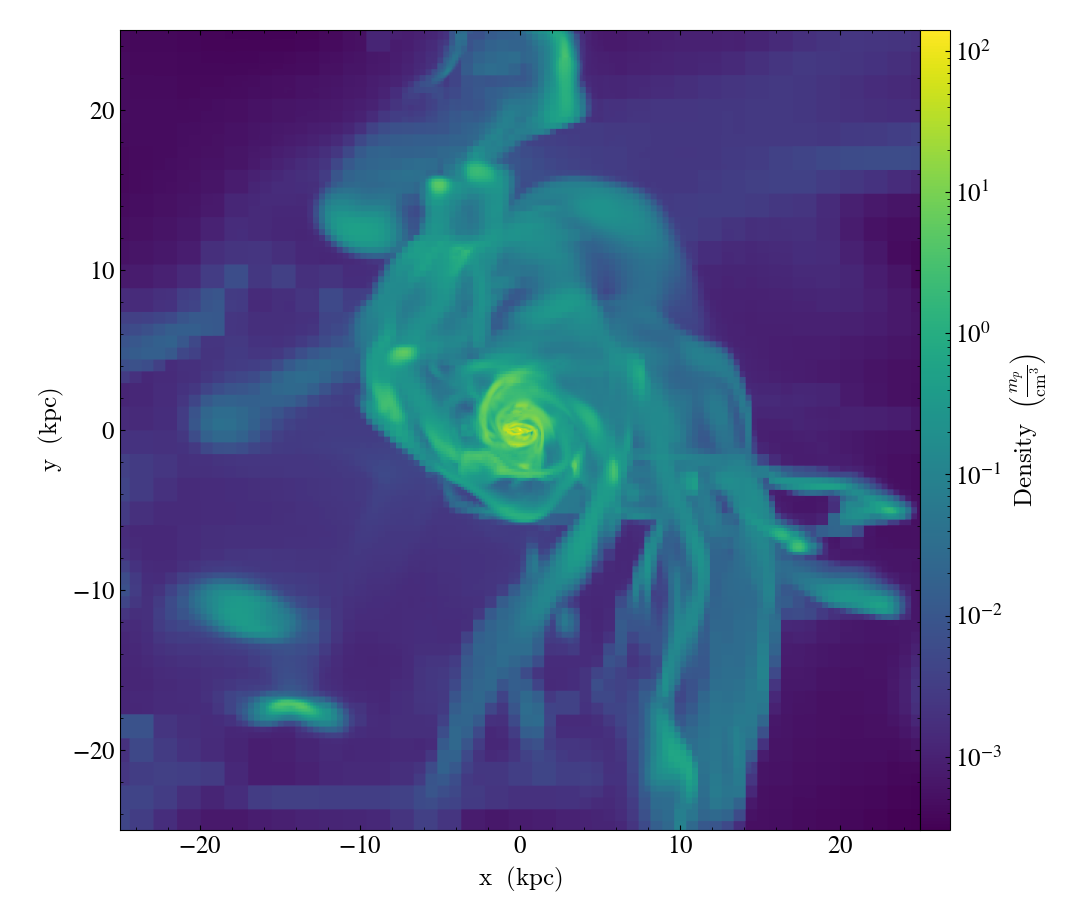
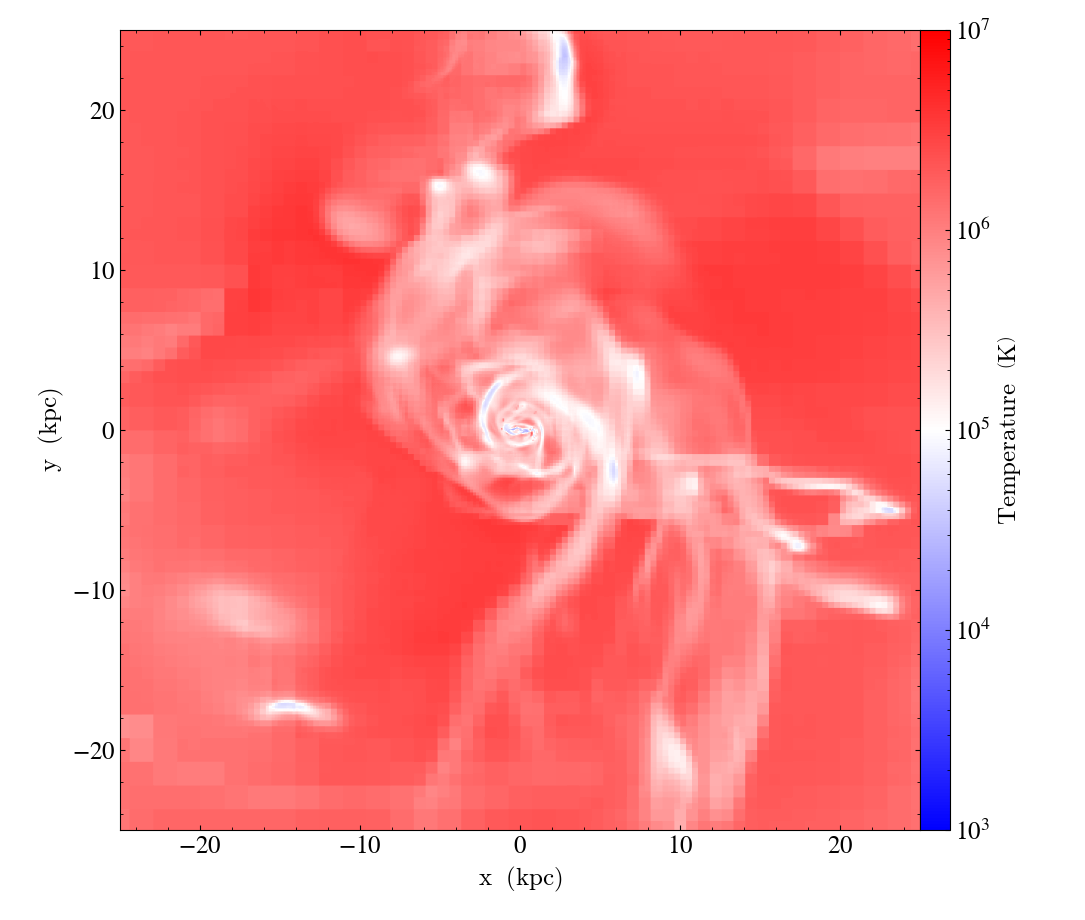

In [307]:
p = yt.ProjectionPlot(ds, "z", [("gas", "density"), ("gas", "temperature")], center=sp.center, data_source=sp, width=(50, "kpc"), weight_field=("gas", "density"))
p.set_cmap("density", "viridis")
p.set_cmap("temperature", "bwr")
p.set_zlim("temperature", 1e3, 1e7)
p.set_unit(("gas", "density"), "mp/cm**3")
p

# Advanced topic: volume rendering

In [306]:
spp = ds.sphere(sp.center, (20, "kpc"))
AM = spp.quantities.angular_momentum_vector(use_gas=True, use_particles=False)
AM_unit = AM.value / np.linalg.norm(AM)

AM_unit

array([-0.027016  , -0.26685463,  0.96335806])

In [ ]:
# data_source = ds.all_data()
# data_source = ds.sphere("max", (1, "Mpc"))
data_source = ds.sphere(sp.center, (200, "kpc"))

sc = yt.create_scene(data_source, lens_type='perspective', field=("gas", "density"))

sc.camera.resolution = (1024, 1024)
sc.camera.focus = data_source.argmax("density")
sc.camera.position = sc.camera.focus + ds.quan(200, "kpc") * AM_unit

source = sc[0]

rho_min, rho_max = ds.arr([1e-3, 1e2], "mp/cm**3").to("g/cm**3")
source.tfh.set_bounds((rho_min, rho_max))
source.tfh.grey_opacity = True
source.tfh.plot('transfer_function.png', profile_field='density')

source.tfh.plot()

AttributeError: 'TransferFunctionHelper' object has no attribute 'set'

yt : [INFO     ] 2023-04-17 14:02:54,236 Rendering scene (Can take a while).
yt : [INFO     ] 2023-04-17 14:02:54,244 Creating volume
yt : [WARNING  ] 2023-04-17 14:02:55,425 RAMSESDomainSubset (info_00230): , base_region=YTSphere (info_00230): , center=[7.29726185e+25 7.51257992e+25 7.55447626e+25] cm, radius=6.17135516192465e+23 cm, domain=RAMSESDomainFile: 39, ds=info_00230.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-04-17 14:02:55,446 RAMSESDomainSubset (info_00230): , base_region=YTSphere (info_00230): , center=[7.29726185e+25 7.51257992e+25 7.55447626e+25] cm, radius=6.17135516192465e+23 cm, domain=RAMSESDomainFile: 44, ds=info_00230.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-04-17 14:02:55,462 RAMSESDomainSubset (info_00230): , base_region=YTSphere (info_00230): , center=[7.29726185e+25 7.51257992e+25 7.5

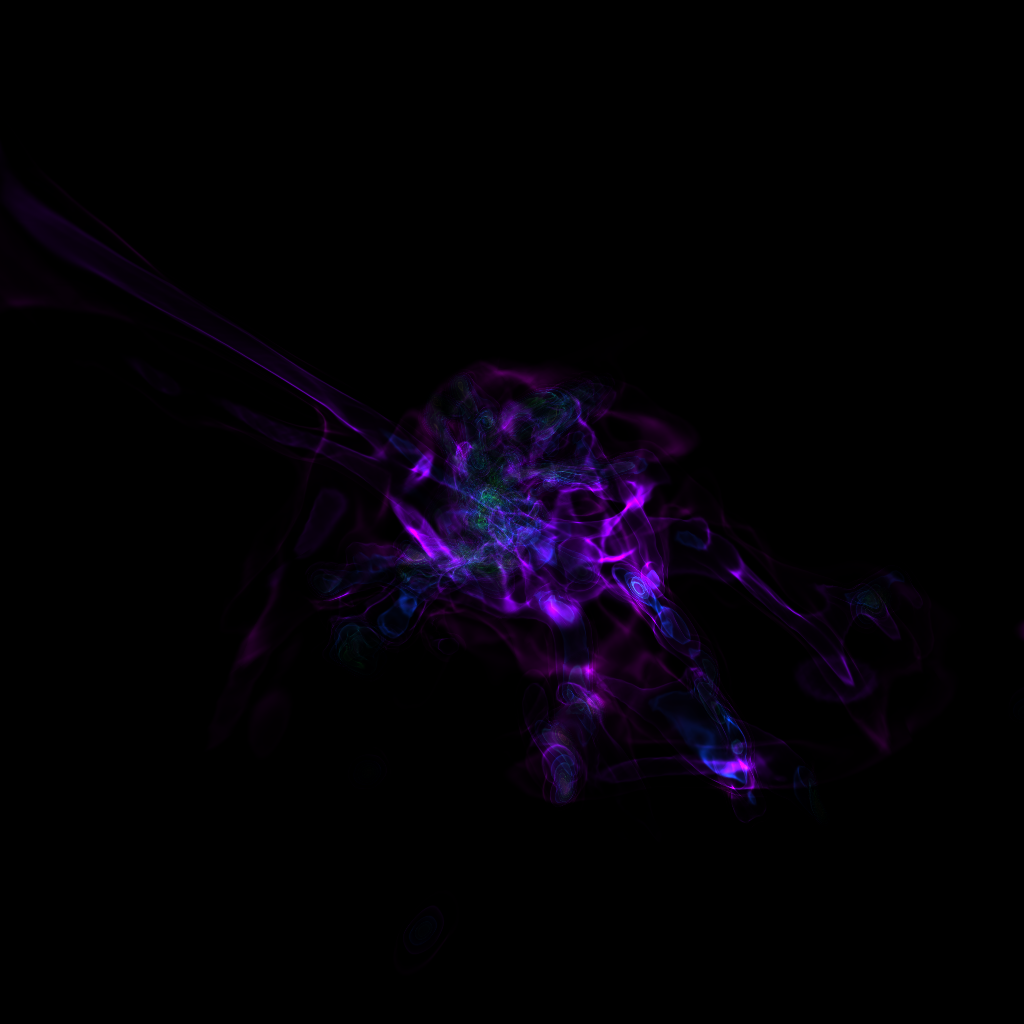

In [ ]:
sc.render()
sc.show(sigma_clip=8.0)

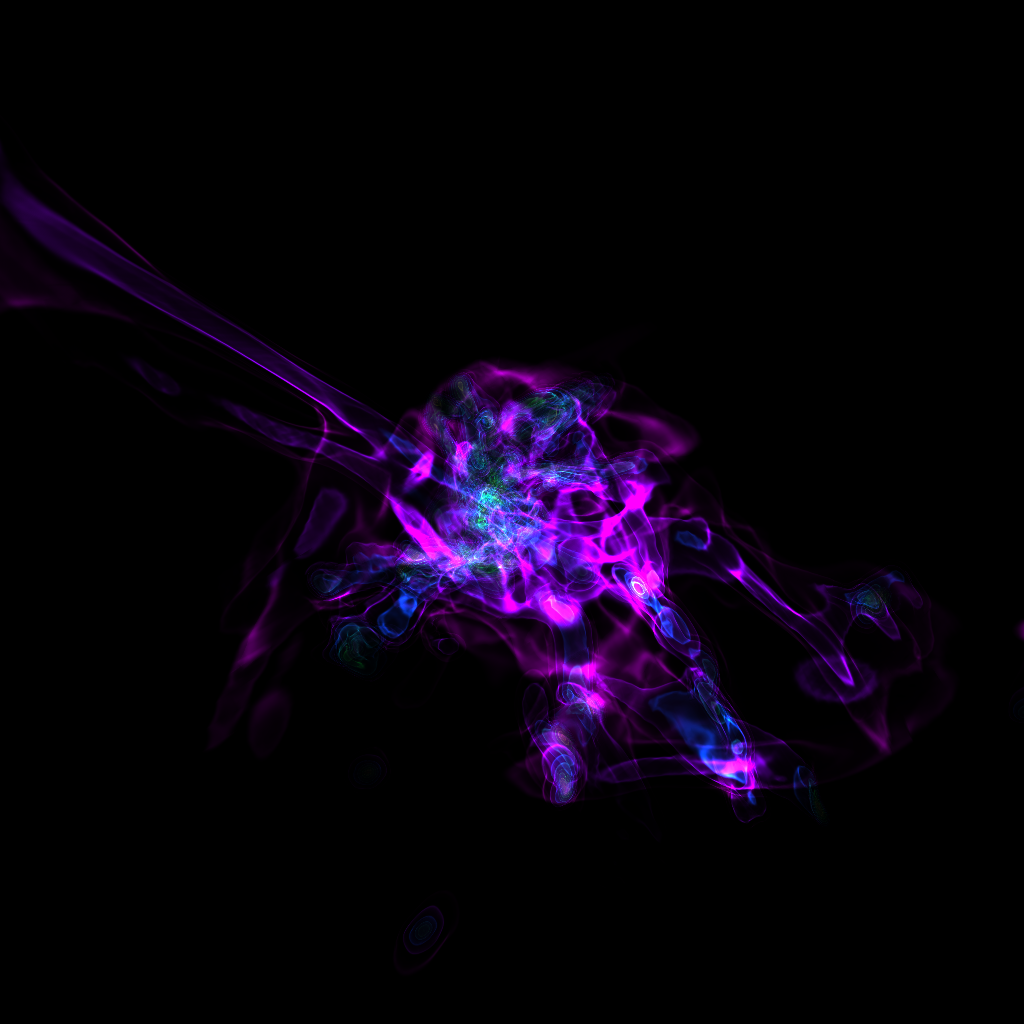

In [ ]:
sc.show(sigma_clip=3)

# Advanced topic: particle-to-mesh, mesh-to-particle

## Particle-to-mesh

This implements nearest/CIC interpolation.

In [377]:
p = yt.ProjectionPlot(ds, "z",
    [
        ("deposit", "gas_tracer_cic"),
        ("gas", "density"),
    ],
    data_source=sp,
    width=(200, "kpc"),
    center=sp.center,
    weight_field="density"
)

yt : [INFO     ] 2023-04-17 14:26:30,142 Projection completed
yt : [INFO     ] 2023-04-17 14:26:30,144 xlim = 0.485623 0.489748
yt : [INFO     ] 2023-04-17 14:26:30,144 ylim = 0.500013 0.504138
yt : [INFO     ] 2023-04-17 14:26:30,145 xlim = 0.485623 0.489748
yt : [INFO     ] 2023-04-17 14:26:30,146 ylim = 0.500013 0.504138
yt : [INFO     ] 2023-04-17 14:26:30,147 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2023-04-17 14:26:30,261 Making a fixed resolution buffer of (('deposit', 'gas_tracer_cic')) 800 by 800



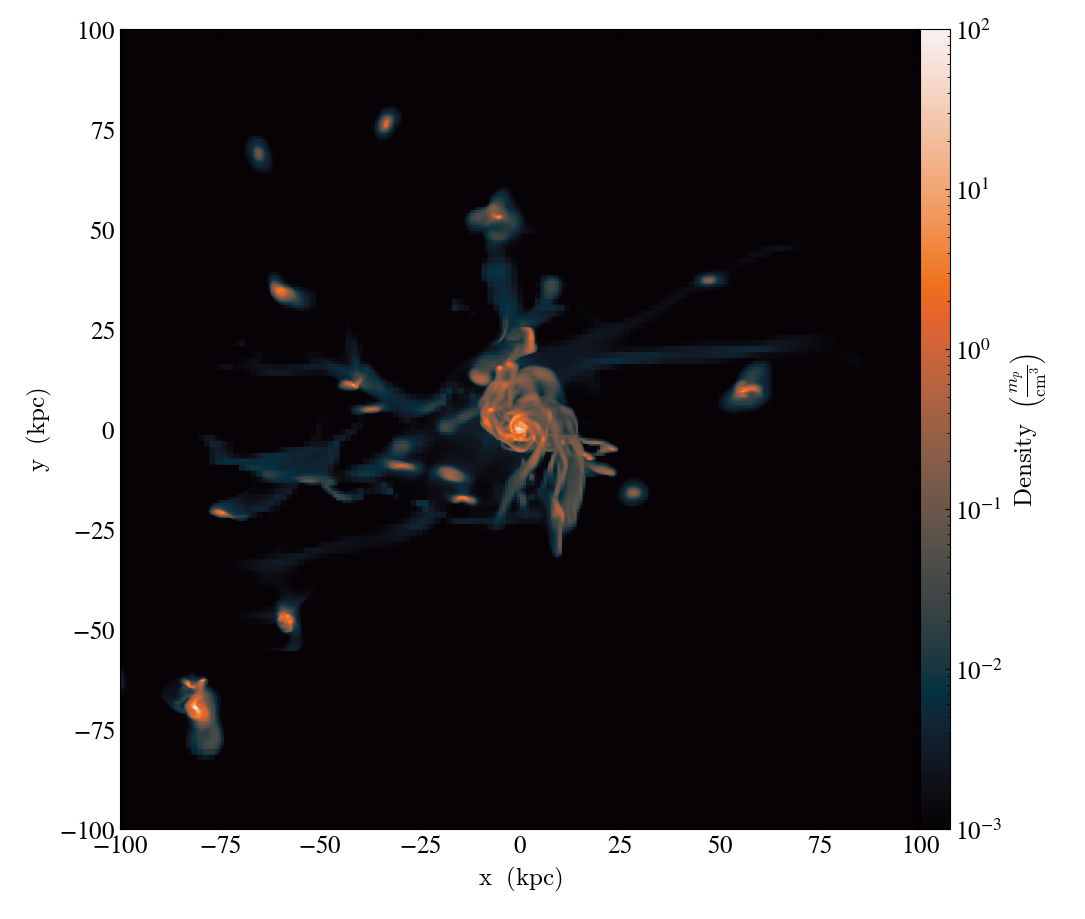
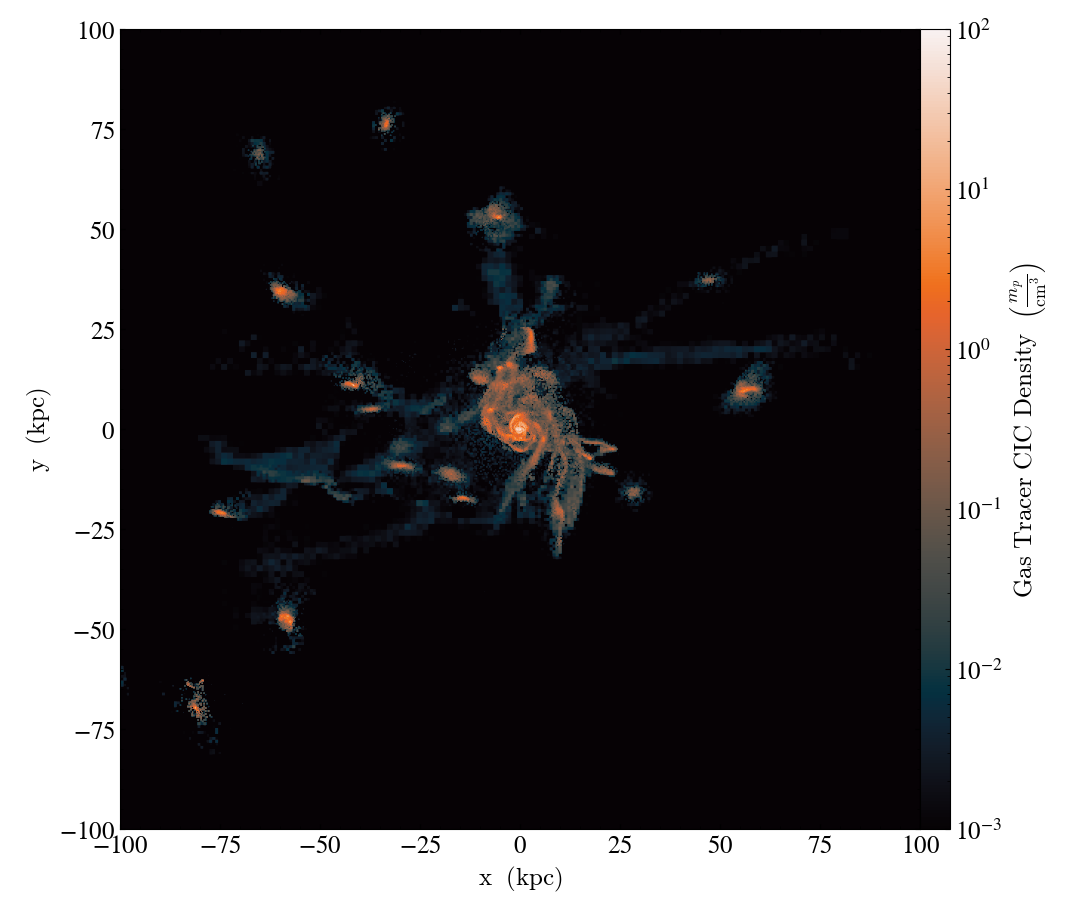

In [381]:
p.set_unit(("gas", "density"), "mp/cm**3")
p.set_unit(("deposit", "gas_tracer_cic"), "mp/cm**3")
p.set_zlim(("gas", "density"), 1e-3, 1e2)
p.set_zlim(("deposit", "gas_tracer_cic"), 1e-3, 1e2)
p.set_cmap(("gas", "density"), "dusk")
p.set_cmap(("deposit", "gas_tracer_cic"), "dusk")

## Mesh-to-particle

In [383]:
ds.add_mesh_sampling_particle_field(("gas", "temperature"), ptype="gas_tracer")

In [404]:
ids = sp["gas_tracer", "particle_identity"].astype(int)
T = sp["gas_tracer", "cell_gas_temperature"]

print(f'There are {len(ids):,} particles')
print(f'\t⇒ sp["gas_tracer", "cell_gas_temperature"].shape = ({T.shape[0]:},)')
print(f'There are {len(sp["gas", "density"]):,} gas cells in the region')

There are 513,120 particles
	⇒ sp["gas_tracer", "cell_gas_temperature"].shape = (513120,)
There are 5,495,675 gas cells in the region


A more complex example. This will assign the cell velocity divergence to the gas tracer particle in the current cell.
Internally, this will:
1. For each cell, find the 3×3×3 neighboring cells
2. Compute the divergence of the velocity field with a finite-difference 
3. Find which cell contains each particle
4. Assign the velocity divergence to the particle

In [405]:
ds.add_mesh_sampling_particle_field(("gas", "velocity_divergence"), ptype="gas_tracer")

In [ ]:
sp["gas_traer"] 

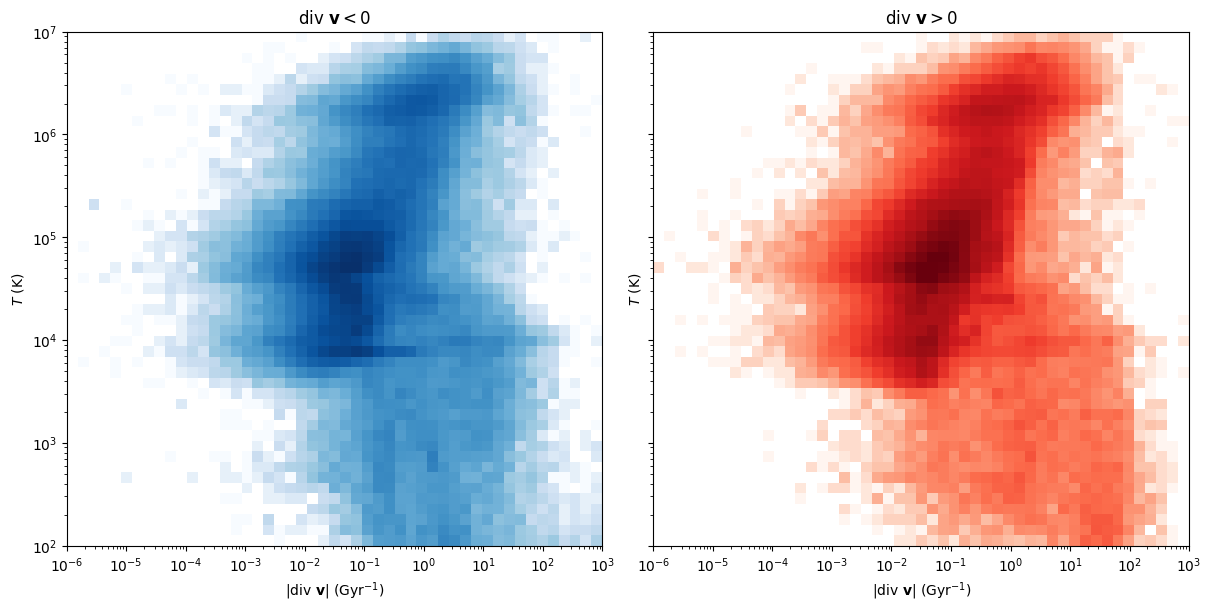

In [433]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True, sharex=True, constrained_layout=True)

for sign, ax, title, cmap in zip((-1, 1), axes, ("$\mathrm{div}\ \mathbf{v}<0$", "$\mathrm{div}\ \mathbf{v}>0$"), ("Blues", "Reds")):
    mask = sp["gas_tracer", "cell_gas_velocity_divergence"] * sign > 0
    ax.hist2d(
        np.abs((sp["gas_tracer", "cell_gas_velocity_divergence"].to("Gyr**-1"))[mask]),
        sp["gas_tracer", "cell_gas_temperature"][mask],
        bins=(np.geomspace(1e-6, 1e3, 50), np.geomspace(1e2, 1e7, 50)),
        norm=plt.matplotlib.colors.LogNorm(),
        cmap=cmap,
    )
    ax.set(
        xlabel=r"$|\mathrm{div}\ \mathbf{v}|$ ($\mathrm{Gyr}^{-1}$)",
        ylabel=r"$T$ ($\mathrm{K}$)",
        xscale="log",
        yscale="log",
        title=title,
    )

# Advanced topic: adding derived fields

## Local-cell access

In [344]:
ad = ds.all_data()

yt : [WARNING  ] 2023-04-17 14:12:58,237 The DM particle filter already exists. Overriding.
yt : [WARNING  ] 2023-04-17 14:12:58,237 The star particle filter already exists. Overriding.
yt : [WARNING  ] 2023-04-17 14:12:58,237 The cloud particle filter already exists. Overriding.
yt : [WARNING  ] 2023-04-17 14:12:58,238 The dust particle filter already exists. Overriding.
yt : [WARNING  ] 2023-04-17 14:12:58,238 The star_tracer particle filter already exists. Overriding.
yt : [WARNING  ] 2023-04-17 14:12:58,238 The cloud_tracer particle filter already exists. Overriding.
yt : [WARNING  ] 2023-04-17 14:12:58,239 The dust_tracer particle filter already exists. Overriding.
yt : [WARNING  ] 2023-04-17 14:12:58,239 The gas_tracer particle filter already exists. Overriding.
yt : [INFO     ] 2023-04-17 14:12:58,239 Adding particle_type: DM
yt : [INFO     ] 2023-04-17 14:12:58,247 Adding particle_type: star
yt : [INFO     ] 2023-04-17 14:12:58,255 Adding particle_type: cloud
yt : [INFO     ] 2

In [352]:
import yt.units as u

def _entropy(field, data):
    K = u.kb * data["gas", "temperature"] * data["gas", "Electron_number_density"]**(-2/3)
    return K

ds.add_field(name=("gas", "entropy"), units="cm**4 * g / s**2", function=_entropy, sampling_type="cell")

yt : [INFO     ] 2023-04-17 14:21:10,617 Projection completed
yt : [INFO     ] 2023-04-17 14:21:10,618 xlim = 0.496920 0.507231
yt : [INFO     ] 2023-04-17 14:21:10,618 ylim = 0.499720 0.510031
yt : [INFO     ] 2023-04-17 14:21:10,618 xlim = 0.496920 0.507231
yt : [INFO     ] 2023-04-17 14:21:10,619 ylim = 0.499720 0.510031
yt : [INFO     ] 2023-04-17 14:21:10,619 Making a fixed resolution buffer of (('gas', 'entropy')) 800 by 800



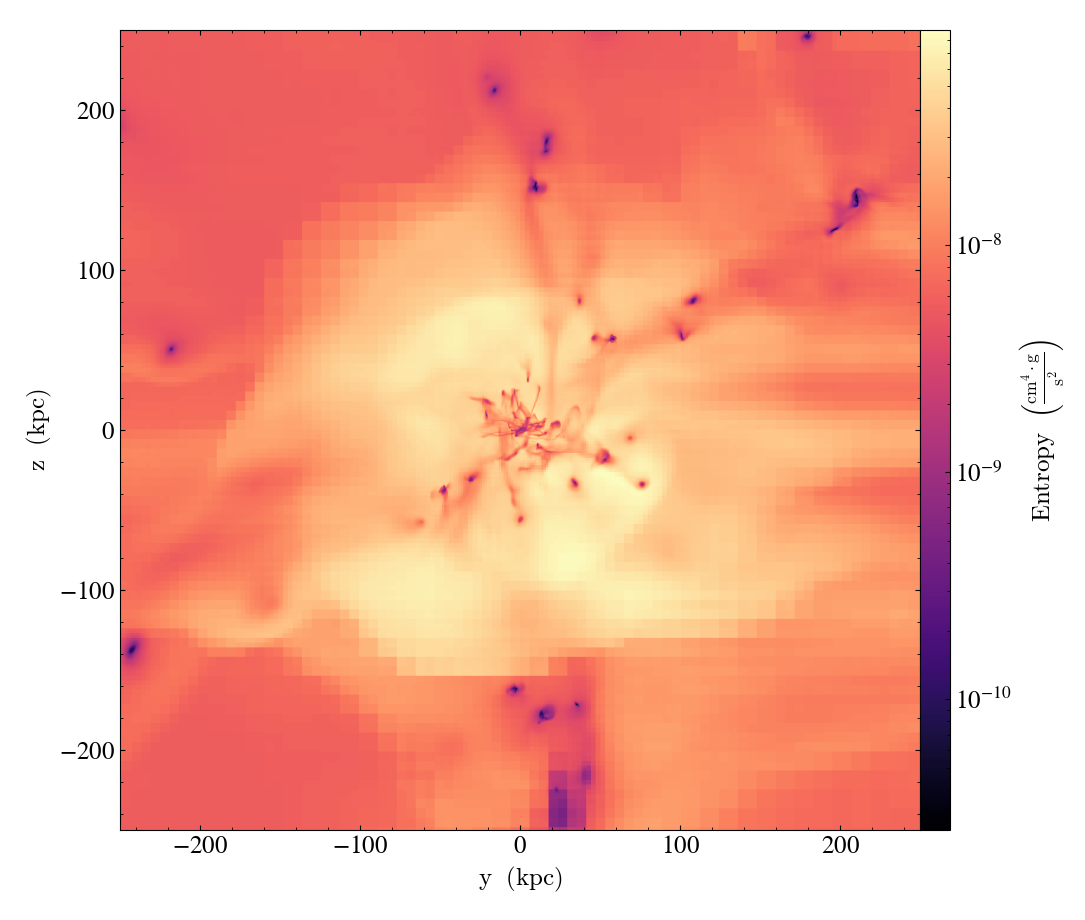

In [359]:
p = yt.ProjectionPlot(ds, "x", ("gas", "entropy"), center=sp.center, data_source=sp, width=(500, "kpc"), weight_field=("gas", "density"))
p.set_cmap("entropy", "magma")

## Spatially-aware quantities

**Warning**: yt doesn't know which variable is intensive/extensive! So the interpolation may be wrong depending on the variable.

In [434]:
def _velocity_dispersion(field, data):
    from itertools import product
    sigma = np.zeros(data["gas", "momentum_x"].shape)

    print(data["gas", "density"].shape)

    for direction in "xyz":
        v = data["gas", f"momentum_{direction}"].value
        w = np.ones_like(data["cell_mass"].value)
        for i, j, k in product((1, 2), (1, 2), (1, 2)):
            vv = v[i-1:i+2, j-1:j+2, k-1:k+2].copy()
            ww = w[i-1:i+2, j-1:j+2, k-1:k+2].copy()
            vv_mean = np.average(vv, weights=ww, axis=(0, 1, 2))
            sigma[i, j, k] += np.average((vv-vv_mean)**2, weights=ww, axis=(0, 1, 2))

    return data.apply_units(np.sqrt(sigma), data["gas", "momentum_x"].units) / data["gas", "cell_mass"] / 27

ds.add_field(name=("gas", "velocity_dispersion"), units=u.km/u.s, function=_velocity_dispersion,
             sampling_type="cell", force_override=True, validators=[yt.ValidateSpatial(ghost_zones=1)])
ad = ds.all_data()
sp = ds.sphere("max", (1, "Mpc"))

yt : [INFO     ] 2023-04-17 14:46:06,754 max value is 9.32094e-22 at 0.4876856803894043 0.5020756721496582 0.5048756599426270


yt : [WARNING  ] 2023-04-17 14:46:29,882 RAMSESDomainSubset (info_00230): , base_region=YTSlice (info_00230): , axis=0, coord=7.297261851793173e+25 cm, domain=RAMSESDomainFile: 14, ds=info_00230.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-04-17 14:46:31,287 RAMSESDomainSubset (info_00230): , base_region=YTSlice (info_00230): , axis=0, coord=7.297261851793173e+25 cm, domain=RAMSESDomainFile: 16, ds=info_00230.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-04-17 14:46:31,882 RAMSESDomainSubset (info_00230): , base_region=YTSlice (info_00230): , axis=0, coord=7.297261851793173e+25 cm, domain=RAMSESDomainFile: 39, ds=info_00230.retrieve_ghost_zones was called with the `smoothed` argument set to True. This is not supported, ignoring it.
yt : [WARNING  ] 2023-04-17 14:46:36,612 RAMSESDomainSubset (info_00230): , base_regi


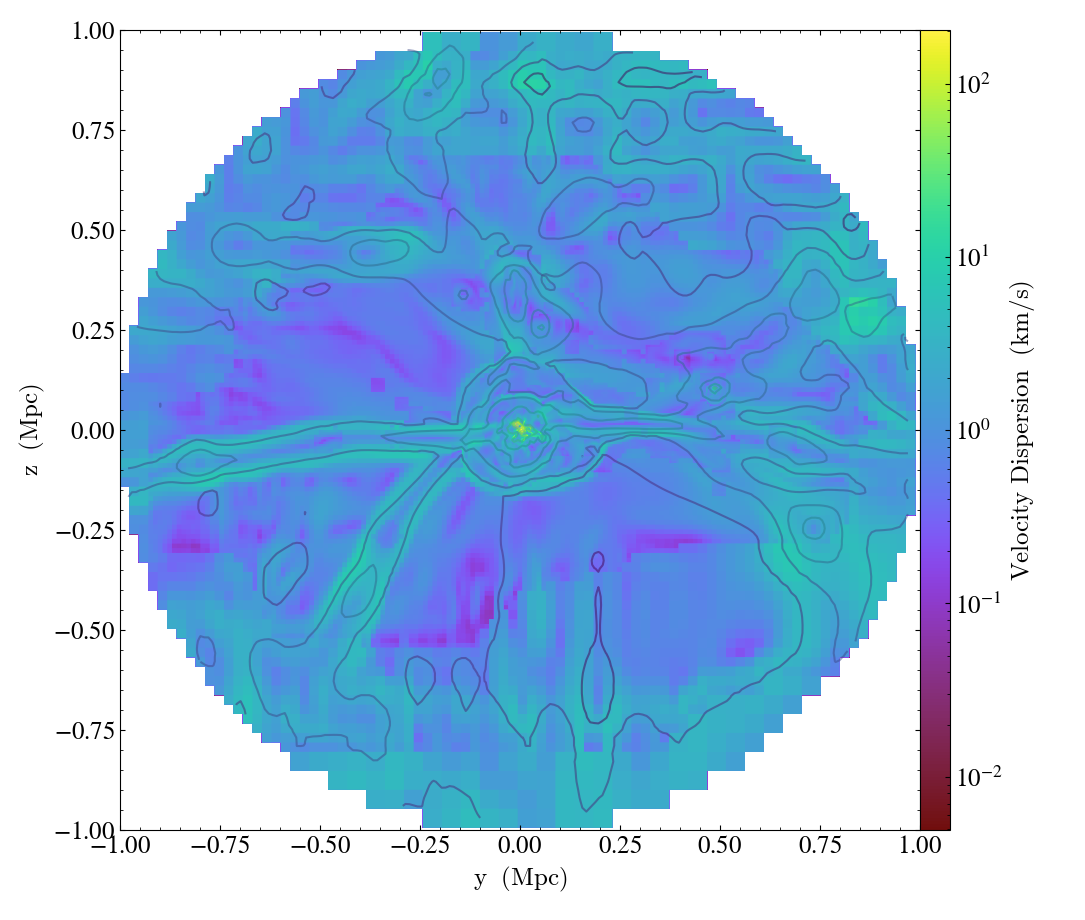

In [435]:
s = yt.SlicePlot(ds, "x", ("gas", "velocity_dispersion"), center="max", data_source=sp, width=(2, "Mpc"))
s.annotate_contour(("gas", "density"), ncont=10, clim=(1e-30, 1e-25), plot_args={"alpha": 0.5})